## Analysis and Insights - KIPP Hawaii High School (2020 S1)

Created by Anonymous
For the use of KIPP Foundation

Input:
    KIPP Hawaii student grade data
    
Output:
    GPAs per student
    GPAs per course
    GPAs per individual class

### Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Load Data

In [2]:
os.getcwd()

'/Users/astanley'

In [3]:
os.chdir('/Users/astanley/Downloads')

In [4]:
os.getcwd()

'/Users/astanley/Downloads'

In [5]:
data_in = pd.read_csv('kipp_hawaii_data.csv', delimiter=',')

In [6]:
data_in.head()

,SchoolYear,Term,SchoolName,StudentID,StudentName,GradeLevel,CourseName,SectionID,PercentGrade,LetterGrade,GPAPoints,AddedGPAValue,PotentialCredit
0,2020,S1,KIPP Hawaii Preparatory High School,112002822,"Abramov, Moshe",9th,Advisory,103292,62,F,0.0,0,0.0
1,2020,S1,KIPP Hawaii Preparatory High School,112002822,"Abramov, Moshe",9th,Algebra I,103255,56,F,0.0,0,0.5
2,2020,S1,KIPP Hawaii Preparatory High School,112002822,"Abramov, Moshe",9th,Chorus,103271,86,B,3.3,0,0.5
3,2020,S1,KIPP Hawaii Preparatory High School,112002822,"Abramov, Moshe",9th,Composition I,103189,70,C-,2.0,0,0.5
4,2020,S1,KIPP Hawaii Preparatory High School,112002822,"Abramov, Moshe",9th,Pre-AP Biology,103228,62,F,0.0,0,0.5


### Clean Data

In [7]:
data_in.columns

Index(['SchoolYear', 'Term', 'SchoolName', 'StudentID', 'StudentName',
       'GradeLevel', 'CourseName', 'SectionID', 'PercentGrade', 'LetterGrade',
       'GPAPoints', 'AddedGPAValue', 'PotentialCredit'],
      dtype='object')

In [8]:
data_in.dtypes

SchoolYear           int64
Term                object
SchoolName          object
StudentID            int64
StudentName         object
GradeLevel          object
CourseName          object
SectionID            int64
PercentGrade         int64
LetterGrade         object
GPAPoints          float64
AddedGPAValue        int64
PotentialCredit    float64
dtype: object

In [9]:
dat = data_in[['StudentName', 'StudentID', 'GradeLevel', 'CourseName', 'SectionID', 'PercentGrade',
              'LetterGrade', 'GPAPoints', 'AddedGPAValue', 'PotentialCredit']]

In [10]:
def calc_standard_gpa(row):
    if row['PotentialCredit'] != 0:
        return ((row['GPAPoints']+row['AddedGPAValue'])*row['PotentialCredit'])/(row['PotentialCredit'])
    else: return 0

In [11]:
#Create a standard GPA parameter in accordance with KIPP's Standard GPA Formula
dat['StandardGPA'] = dat.apply(calc_standard_gpa, axis=1)
dat.head()

/var/folders/t7/nd_t52b16_12p60pgmky6nch0000gn/T/ipykernel_3492/3873791571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['StandardGPA'] = dat.apply(calc_standard_gpa, axis=1)


,StudentName,StudentID,GradeLevel,CourseName,SectionID,PercentGrade,LetterGrade,GPAPoints,AddedGPAValue,PotentialCredit,StandardGPA
0,"Abramov, Moshe",112002822,9th,Advisory,103292,62,F,0.0,0,0.0,0.0
1,"Abramov, Moshe",112002822,9th,Algebra I,103255,56,F,0.0,0,0.5,0.0
2,"Abramov, Moshe",112002822,9th,Chorus,103271,86,B,3.3,0,0.5,3.3
3,"Abramov, Moshe",112002822,9th,Composition I,103189,70,C-,2.0,0,0.5,2.0
4,"Abramov, Moshe",112002822,9th,Pre-AP Biology,103228,62,F,0.0,0,0.5,0.0


In [12]:
dat.describe()

,StudentID,SectionID,PercentGrade,GPAPoints,AddedGPAValue,PotentialCredit,StandardGPA
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.027014e+08,103244.337500,78.457000,2.610550,0.04800,0.442500,2.244550
std,2.905078e+07,42.317171,13.336682,1.311027,0.21382,0.197391,1.471422
min,1.200049e+07,103184.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.120008e+08,103215.000000,71.000000,2.000000,0.00000,0.500000,1.300000
50%,1.120012e+08,103242.000000,80.000000,3.000000,0.00000,0.500000,2.500000
75%,1.120021e+08,103269.000000,88.000000,3.800000,0.00000,0.500000,3.500000
max,1.120029e+08,103558.000000,101.000000,4.000000,1.00000,1.000000,5.000000


In [13]:
# Adjust 'StandardGPA' for no credit bearing course
dat = dat.drop(dat[dat["CourseName"] == 'Advisory'].index)

In [14]:
dat.describe()

,StudentID,SectionID,PercentGrade,GPAPoints,AddedGPAValue,PotentialCredit,StandardGPA
count,1.716000e+03,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000
mean,1.027357e+08,103236.724359,78.322261,2.560082,0.055944,0.515734,2.616026
std,2.900389e+07,40.837491,12.919820,1.209080,0.229881,0.087316,1.245496
min,1.200049e+07,103184.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,1.120008e+08,103212.000000,71.000000,2.000000,0.000000,0.500000,2.000000
50%,1.120012e+08,103232.000000,80.000000,3.000000,0.000000,0.500000,3.000000
75%,1.120021e+08,103259.000000,87.000000,3.500000,0.000000,0.500000,3.500000
max,1.120029e+08,103558.000000,101.000000,4.000000,1.000000,1.000000,5.000000


In [15]:
# Create students' overall GPA based on Standard GPA calculation
dat['StdGPA'] = dat.groupby('StudentID')['StandardGPA'].transform('mean')
dat.head()

,StudentName,StudentID,GradeLevel,CourseName,SectionID,PercentGrade,LetterGrade,GPAPoints,AddedGPAValue,PotentialCredit,StandardGPA,StdGPA
1,"Abramov, Moshe",112002822,9th,Algebra I,103255,56,F,0.0,0,0.5,0.0,1.6
2,"Abramov, Moshe",112002822,9th,Chorus,103271,86,B,3.3,0,0.5,3.3,1.6
3,"Abramov, Moshe",112002822,9th,Composition I,103189,70,C-,2.0,0,0.5,2.0,1.6
4,"Abramov, Moshe",112002822,9th,Pre-AP Biology,103228,62,F,0.0,0,0.5,0.0,1.6
5,"Abramov, Moshe",112002822,9th,Pre-AP English 1,103199,73,C,2.3,0,0.5,2.3,1.6


In [16]:
# Student GPA set
mean_gpa = dat[['StudentID', 'StandardGPA', 'PercentGrade']]
mean_gpa['StdAvgGPA'] = mean_gpa.groupby('StudentID')['StandardGPA'].transform('mean')
mean_gpa['StdAvgPerc'] = mean_gpa.groupby('StudentID')['PercentGrade'].transform('mean')
mean_gpa[['StudentID', 'StdAvgGPA', 'StdAvgPerc']].drop_duplicates().head()

/var/folders/t7/nd_t52b16_12p60pgmky6nch0000gn/T/ipykernel_3492/1719108587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_gpa['StdAvgGPA'] = mean_gpa.groupby('StudentID')['StandardGPA'].transform('mean')
/var/folders/t7/nd_t52b16_12p60pgmky6nch0000gn/T/ipykernel_3492/1719108587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_gpa['StdAvgPerc'] = mean_gpa.groupby('StudentID')['PercentGrade'].transform('mean')


,StudentID,StdAvgGPA,StdAvgPerc
1,112002822,1.600000,69.666667
8,112002159,2.145455,72.545455
15,112001281,3.266667,86.000000
23,112002654,3.280000,85.600000
29,12000605,3.200000,78.142857


In [17]:
# Class GPA set. Maybe their are particular classes that struggle more than others
class_gpa = dat[['CourseName', 'SectionID', 'StandardGPA', 'PercentGrade']]
class_gpa['StdAvgGPA'] = class_gpa.groupby(['CourseName', 'SectionID'])['StandardGPA'].transform('mean')
class_gpa['StdAvgPerc'] = class_gpa.groupby(['CourseName', 'SectionID'])['PercentGrade'].transform('mean')
class_gpa = class_gpa[['CourseName', 'SectionID', 'StdAvgGPA', 'StdAvgPerc']].drop_duplicates().sort_values(by=['StdAvgGPA'])
class_gpa.head()

/var/folders/t7/nd_t52b16_12p60pgmky6nch0000gn/T/ipykernel_3492/182891814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_gpa['StdAvgGPA'] = class_gpa.groupby(['CourseName', 'SectionID'])['StandardGPA'].transform('mean')
/var/folders/t7/nd_t52b16_12p60pgmky6nch0000gn/T/ipykernel_3492/182891814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_gpa['StdAvgPerc'] = class_gpa.groupby(['CourseName', 'SectionID'])['PercentGrade'].transform('mean')


,CourseName,SectionID,StdAvgGPA,StdAvgPerc
75,Algebra II/Pre-Calculus,103264,1.292308,66.769231
208,Algebra I,103253,1.381250,66.875000
60,Physical Education,103221,1.448000,67.800000
353,Algebra I,103225,1.618182,65.409091
12,Pre-AP English II,103193,1.619048,69.666667


In [18]:
# Course GPA set. Maybe there are courses that most students struggle with overall.
course_gpa = dat[['CourseName', 'StandardGPA', 'PercentGrade']]
course_gpa['StdAvgGPA'] = course_gpa.groupby('CourseName')['StandardGPA'].transform('mean')
course_gpa['StdAvgPerc'] = course_gpa.groupby('CourseName')['PercentGrade'].transform('mean')
course_gpa = course_gpa[['CourseName', 'StdAvgGPA', 'StdAvgPerc']].drop_duplicates().sort_values(by=['StdAvgGPA'])
course_gpa.head()

/var/folders/t7/nd_t52b16_12p60pgmky6nch0000gn/T/ipykernel_3492/2223633886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_gpa['StdAvgGPA'] = course_gpa.groupby('CourseName')['StandardGPA'].transform('mean')
/var/folders/t7/nd_t52b16_12p60pgmky6nch0000gn/T/ipykernel_3492/2223633886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_gpa['StdAvgPerc'] = course_gpa.groupby('CourseName')['PercentGrade'].transform('mean')


,CourseName,StdAvgGPA,StdAvgPerc
8,Algebra II/Pre-Calculus,1.619565,69.347826
1,Algebra I,1.750427,69.743590
40,Physical Education,1.917241,72.456897
4,Pre-AP Biology,1.957391,73.173913
12,Pre-AP English II,2.022353,72.482353


### GPA Distribution Anaylsis

In [19]:
mean_gpa.describe()

,StudentID,StandardGPA,PercentGrade,StdAvgGPA,StdAvgPerc
count,1.716000e+03,1716.000000,1716.000000,1716.000000,1716.000000
mean,1.027357e+08,2.616026,78.322261,2.616026,78.322261
std,2.900389e+07,1.245496,12.919820,0.828756,8.222724
min,1.200049e+07,0.000000,0.000000,0.000000,42.500000
25%,1.120008e+08,2.000000,71.000000,2.181818,74.153846
50%,1.120012e+08,3.000000,80.000000,2.707143,78.800000
75%,1.120021e+08,3.500000,87.000000,3.183333,83.166667
max,1.120029e+08,5.000000,101.000000,4.342857,98.571429


#### Shows that only 75% percent of students have a GPA of 2.18 or higher. Target 85% above 2.5.


<AxesSubplot:xlabel='StdAvgGPA', ylabel='Density'>

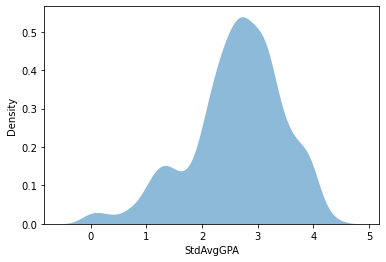

In [20]:
#Distribution of Avg GPA per student. Helps identify outliers.
sns.kdeplot(
   data=mean_gpa, 
    x="StdAvgGPA",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

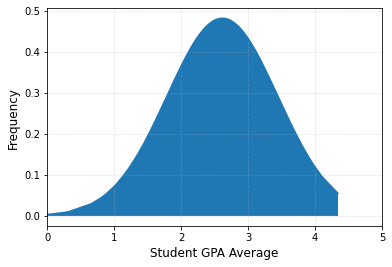

In [21]:
# Probability Distribution Function for GPA average per student
# Calculating mean and Stdev of GPAPoints
df_mean = np.mean(mean_gpa["StdAvgGPA"])
df_std = np.std(mean_gpa["StdAvgGPA"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(mean_gpa["StdAvgGPA"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(mean_gpa["StdAvgGPA"].sort_values(), pdf)
plt.fill_between(mean_gpa["StdAvgGPA"].sort_values(), pdf)
plt.xlim([0,5])  
plt.xlabel("Student GPA Average", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

<AxesSubplot:xlabel='StdAvgPerc', ylabel='Density'>

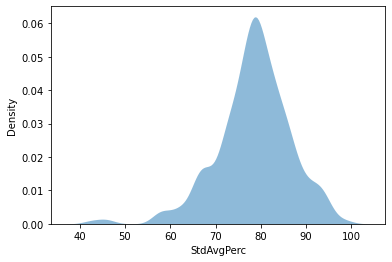

In [22]:
#Distribution of Avg Percent Grade per student
sns.kdeplot(
   data=mean_gpa, 
    x="StdAvgPerc",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

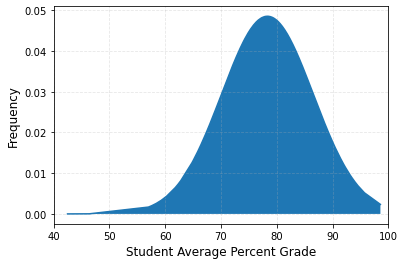

In [23]:
# Probability Distribution Function for Average Percent Grade per student
# Calculating mean and Stdev of GPAPoints
df_mean = np.mean(mean_gpa["StdAvgPerc"])
df_std = np.std(mean_gpa["StdAvgPerc"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(mean_gpa["StdAvgPerc"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(mean_gpa["StdAvgPerc"].sort_values(), pdf)
plt.fill_between(mean_gpa["StdAvgPerc"].sort_values(), pdf)
plt.xlim([40,100])  
plt.xlabel("Student Average Percent Grade", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

<AxesSubplot:xlabel='GPAPoints', ylabel='Density'>

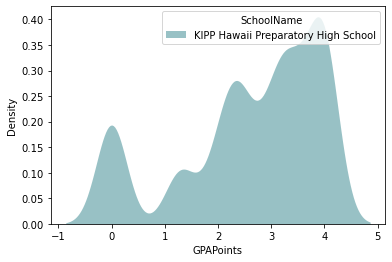

In [24]:
#Distribution of all GPAPoints for comparison
sns.kdeplot(
   data=data_in, 
    x="GPAPoints", hue="SchoolName",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

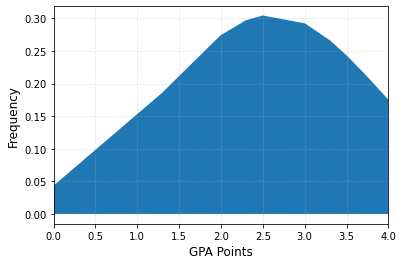

In [25]:
# Probability Distribution Function for all GPA Points

# Calculating mean and Stdev of GPAPoints
df_mean = np.mean(data_in["GPAPoints"])
df_std = np.std(data_in["GPAPoints"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(data_in["GPAPoints"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(data_in["GPAPoints"].sort_values(), pdf)
plt.fill_between(data_in["GPAPoints"].sort_values(), pdf)
plt.xlim([0,4])  
plt.xlabel("GPA Points", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

<AxesSubplot:xlabel='PercentGrade', ylabel='Density'>

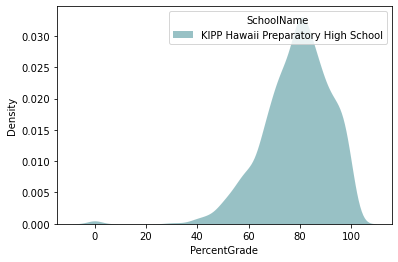

In [26]:
#Distribution of all Percent Grade for comparison
sns.kdeplot(
   data=data_in, 
    x="PercentGrade", hue="SchoolName",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

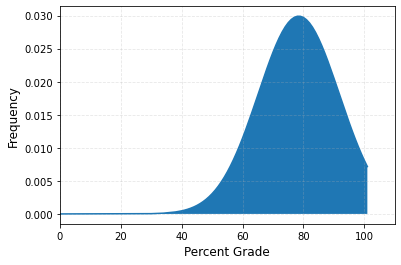

In [27]:
# Probability Distribution Function for all Percent Grades

# Calculating mean and Stdev of GPAPoints
df_mean = np.mean(data_in["PercentGrade"])
df_std = np.std(data_in["PercentGrade"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(data_in["PercentGrade"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(data_in["PercentGrade"].sort_values(), pdf)
plt.fill_between(data_in["PercentGrade"].sort_values(), pdf)
plt.xlim([0,110])  
plt.xlabel("Percent Grade", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

### GPA Analysis

#### Identify Student with 3.5+, 3.0+, 2.5+ GPA. Target 35%+, 65%+, and 85%+ of student body, respectively

In [28]:
all_std = mean_gpa.count()
print(all_std)

StudentID       1716
StandardGPA     1716
PercentGrade    1716
StdAvgGPA       1716
StdAvgPerc      1716
dtype: int64


In [29]:
top_target = mean_gpa[mean_gpa['StdAvgGPA'] >= 3.5]
print(top_target.count())

StudentID       229
StandardGPA     229
PercentGrade    229
StdAvgGPA       229
StdAvgPerc      229
dtype: int64


In [30]:
mid_target = mean_gpa[mean_gpa['StdAvgGPA'] >= 3.0]
print(mid_target.count())

StudentID       596
StandardGPA     596
PercentGrade    596
StdAvgGPA       596
StdAvgPerc      596
dtype: int64


In [31]:
bot_target = mean_gpa[mean_gpa['StdAvgGPA'] >= 2.5]
print(bot_target.count())

StudentID       1044
StandardGPA     1044
PercentGrade    1044
StdAvgGPA       1044
StdAvgPerc      1044
dtype: int64


In [32]:
print(229/1716)
print(596/1716)
print(1044/1716)

0.13344988344988346
0.3473193473193473
0.6083916083916084


#### Courses with GPAs less than 2.34 are more than 1 standard deviation from the median course GPA

In [33]:
course_gpa.sort_values(by='StdAvgGPA').head(40)

,CourseName,StdAvgGPA,StdAvgPerc
8,Algebra II/Pre-Calculus,1.619565,69.347826
1,Algebra I,1.750427,69.743590
40,Physical Education,1.917241,72.456897
4,Pre-AP Biology,1.957391,73.173913
12,Pre-AP English II,2.022353,72.482353
137,Essential Literacy I,2.073077,72.038462
182,Environmental Science,2.100000,73.078947
53,Pre-Algebra,2.182143,74.285714
13,Spanish I,2.281928,75.385542
11,Pre-AP Chemistry,2.296104,75.532468


In [34]:
course_gpa.describe()

,StdAvgGPA,StdAvgPerc
count,35.000000,35.000000
mean,2.951876,81.497685
std,0.769873,8.135347
min,1.619565,69.347826
25%,2.289016,75.012771
50%,3.110000,80.142857
75%,3.523737,87.056818
max,4.389474,100.000000


#### Individual classes with GPAs less than 1.85 are more than 1 standard deviation from the median class GPA

In [35]:
class_gpa.sort_values(by='StdAvgGPA').head(40)

,CourseName,SectionID,StdAvgGPA,StdAvgPerc
75,Algebra II/Pre-Calculus,103264,1.292308,66.769231
208,Algebra I,103253,1.381250,66.875000
60,Physical Education,103221,1.448000,67.800000
353,Algebra I,103225,1.618182,65.409091
12,Pre-AP English II,103193,1.619048,69.666667
136,Composition I,103186,1.658824,70.294118
1,Algebra I,103255,1.700000,69.750000
29,Algebra I,103254,1.700000,67.500000
8,Algebra II/Pre-Calculus,103263,1.740000,70.560000
47,Physical Education,103220,1.746154,71.038462


In [36]:
class_gpa.describe()

,SectionID,StdAvgGPA,StdAvgPerc
count,98.000000,98.000000,98.000000
mean,103243.183673,2.644162,78.467346
std,55.162804,0.730009,7.168986
min,103184.000000,1.292308,65.409091
25%,103212.250000,2.030824,73.359375
50%,103236.500000,2.580749,77.052632
75%,103261.750000,3.135167,83.473913
max,103558.000000,4.487500,100.000000


#### Taking a deeper look at Algebra II/Pre-Calculus. Shows low overall GPA as well as a particular section of the class having the lowest GPA among classes.

In [37]:
prob_class = dat[dat['CourseName'] == 'Algebra II/Pre-Calculus']
prob_class.head()

,StudentName,StudentID,GradeLevel,CourseName,SectionID,PercentGrade,LetterGrade,GPAPoints,AddedGPAValue,PotentialCredit,StandardGPA,StdGPA
8,"Abyss, Silvana",112002159,11th,Algebra II/Pre-Calculus,103263,54,F,0.0,0,0.5,0.0,2.145455
75,"Atthow, Burr",112002881,10th,Algebra II/Pre-Calculus,103264,55,F,0.0,0,0.5,0.0,1.842857
90,"Bagniuk, Zak",112001635,10th,Algebra II/Pre-Calculus,103263,65,D,1.3,0,0.5,1.3,3.240000
105,"Bandt, Lissie",112000761,11th,Algebra II/Pre-Calculus,103263,77,C+,2.5,0,0.5,2.5,3.900000
180,"Bernette, Laverna",112000906,10th,Algebra II/Pre-Calculus,103263,57,F,0.0,0,0.5,0.0,2.909091


In [38]:
#Compares the distribution of of GPAs for Algebra II 
# to the overall GPAs of the students in the course.
prob_class.describe()

,StudentID,SectionID,PercentGrade,GPAPoints,AddedGPAValue,PotentialCredit,StandardGPA,StdGPA
count,4.600000e+01,46.000000,46.000000,46.000000,46.0,46.0,46.000000,46.000000
mean,1.120018e+08,103263.108696,69.347826,1.619565,0.0,0.5,1.619565,2.854879
std,8.072760e+02,0.674232,11.343559,1.294367,0.0,0.0,1.294367,0.684823
min,1.120008e+08,103262.000000,50.000000,0.000000,0.0,0.5,0.000000,1.200000
25%,1.120010e+08,103263.000000,59.250000,0.000000,0.0,0.5,0.000000,2.356250
50%,1.120016e+08,103263.000000,68.000000,1.650000,0.0,0.5,1.650000,2.921212
75%,1.120027e+08,103264.000000,77.750000,2.500000,0.0,0.5,2.500000,3.196429
max,1.120029e+08,103264.000000,98.000000,4.000000,0.0,0.5,4.000000,4.342857


In [39]:
#Export to csv
mean_gpa.to_csv('KHPHS_student_gpa.csv', index=False)
course_gpa.to_csv('KHPHS_course_gpa.csv', index=False)
class_gpa.to_csv('KHPHS_class_gpa.csv', index=False)